In [4]:
import pandas as pd
import statsmodels.api as sm
co2_data = sm.datasets.co2.load()
df = co2_data.data
df = df.rename(columns={'co2': 'electricity_consumption'})
df = df.sort_index()

In [5]:
print("DataFrame head after loading and setting index:")
print(df.head())
print("\nDataFrame info:")
print(df.info())

DataFrame head after loading and setting index:
            electricity_consumption
1958-03-29                    316.1
1958-04-05                    317.3
1958-04-12                    317.6
1958-04-19                    317.5
1958-04-26                    316.4

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   electricity_consumption  2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB
None


In [6]:
print("Missing values before handling:")
print(df.isnull().sum())
df['electricity_consumption'] = df['electricity_consumption'].interpolate(method='linear')
print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nDataFrame head after handling missing values:")
print(df.head())
print("DataFrame info after handling missing values:")
print(df.info())

Missing values before handling:
electricity_consumption    59
dtype: int64

Missing values after handling:
electricity_consumption    0
dtype: int64

DataFrame head after handling missing values:
            electricity_consumption
1958-03-29                    316.1
1958-04-05                    317.3
1958-04-12                    317.6
1958-04-19                    317.5
1958-04-26                    316.4
DataFrame info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   electricity_consumption  2284 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB
None


In [9]:
df['year'] = df.index.year
df['month_of_year'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek

In [10]:
print("DataFrame head after adding time-based features:")
print(df.head())
print("\nDataFrame info after adding time-based features:")
print(df.info())

DataFrame head after adding time-based features:
            electricity_consumption  year  month_of_year  day_of_month  \
1958-03-29                    316.1  1958              3            29   
1958-04-05                    317.3  1958              4             5   
1958-04-12                    317.6  1958              4            12   
1958-04-19                    317.5  1958              4            19   
1958-04-26                    316.4  1958              4            26   

            day_of_week  
1958-03-29            5  
1958-04-05            5  
1958-04-12            5  
1958-04-19            5  
1958-04-26            5  

DataFrame info after adding time-based features:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   electricity_consumption  2284 non-null   float64
 1

In [11]:
for i in range(1, 5):
    df[f'electricity_consumption_lag_{i}'] = df['electricity_consumption'].shift(i)
print("DataFrame head after adding lagged features:")
print(df.head())
print("\nDataFrame info after adding lagged features:")
print(df.info())
print("\nMissing values after adding lagged features (expected in first rows):")
print(df.isnull().sum())

DataFrame head after adding lagged features:
            electricity_consumption  year  month_of_year  day_of_month  \
1958-03-29                    316.1  1958              3            29   
1958-04-05                    317.3  1958              4             5   
1958-04-12                    317.6  1958              4            12   
1958-04-19                    317.5  1958              4            19   
1958-04-26                    316.4  1958              4            26   

            day_of_week  electricity_consumption_lag_1  \
1958-03-29            5                            NaN   
1958-04-05            5                          316.1   
1958-04-12            5                          317.3   
1958-04-19            5                          317.6   
1958-04-26            5                          317.5   

            electricity_consumption_lag_2  electricity_consumption_lag_3  \
1958-03-29                            NaN                            NaN   
1958-04-0

In [12]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = [
    'electricity_consumption',
    'year',
    'month_of_year',
    'day_of_month',
    'day_of_week'
]
for i in range(1, 5):
    numerical_features.append(f'electricity_consumption_lag_{i}')
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("DataFrame head after normalization:")
print(df.head())
print("\nDataFrame info after normalization:")
print(df.info())
print("\nDescriptive statistics of normalized features:")
print(df[numerical_features].describe())

DataFrame head after normalization:
            electricity_consumption  year  month_of_year  day_of_month  \
1958-03-29                 0.050903   0.0       0.181818      0.933333   
1958-04-05                 0.070608   0.0       0.272727      0.133333   
1958-04-12                 0.075534   0.0       0.272727      0.366667   
1958-04-19                 0.073892   0.0       0.272727      0.600000   
1958-04-26                 0.055829   0.0       0.272727      0.833333   

            day_of_week  electricity_consumption_lag_1  \
1958-03-29          0.0                            NaN   
1958-04-05          0.0                       0.050903   
1958-04-12          0.0                       0.070608   
1958-04-19          0.0                       0.075534   
1958-04-26          0.0                       0.073892   

            electricity_consumption_lag_2  electricity_consumption_lag_3  \
1958-03-29                            NaN                            NaN   
1958-04-05        

In [13]:
import numpy as np
target_variable = 'electricity_consumption'
data = df[[target_variable]].copy()
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]
print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")
print("\nHead of training data:")
print(train_data.head())
print("\nHead of testing data:")
print(test_data.head())

Training data length: 1827
Testing data length: 457

Head of training data:
            electricity_consumption
1958-03-29                 0.050903
1958-04-05                 0.070608
1958-04-12                 0.075534
1958-04-19                 0.073892
1958-04-26                 0.055829

Head of testing data:
            electricity_consumption
1993-04-03                 0.756979
1993-04-10                 0.752053
1993-04-17                 0.761905
1993-04-24                 0.771757
1993-05-01                 0.765189


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (1, 1, 1)      
seasonal_order = (1, 1, 1, 52)
print(f"SARIMAX non-seasonal order: {order}")
print(f"SARIMAX seasonal order: {seasonal_order}")
sarimax_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
sarimax_results = sarimax_model.fit(disp=False) 
print("\nSARIMAX Model Summary:")
print(sarimax_results.summary())

SARIMAX non-seasonal order: (1, 1, 1)
SARIMAX seasonal order: (1, 1, 1, 52)

SARIMAX Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:            electricity_consumption   No. Observations:                 1827
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                6287.847
Date:                            Fri, 21 Nov 2025   AIC                         -12565.693
Time:                                    00:26:58   BIC                         -12538.443
Sample:                                03-29-1958   HQIC                        -12555.611
                                     - 03-27-1993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         

SARIMAX in-sample predictions head:
1958-03-29    0.000000
1958-04-05    0.056272
1958-04-12    0.074647
1958-04-19    0.076956
1958-04-26    0.073845
Freq: W-SAT, Name: predicted_mean, dtype: float64

SARIMAX out-of-sample forecasts head:
1993-04-03    0.756902
1993-04-10    0.757111
1993-04-17    0.769368
1993-04-24    0.767860
1993-05-01    0.770945
Freq: W-SAT, Name: predicted_mean, dtype: float64


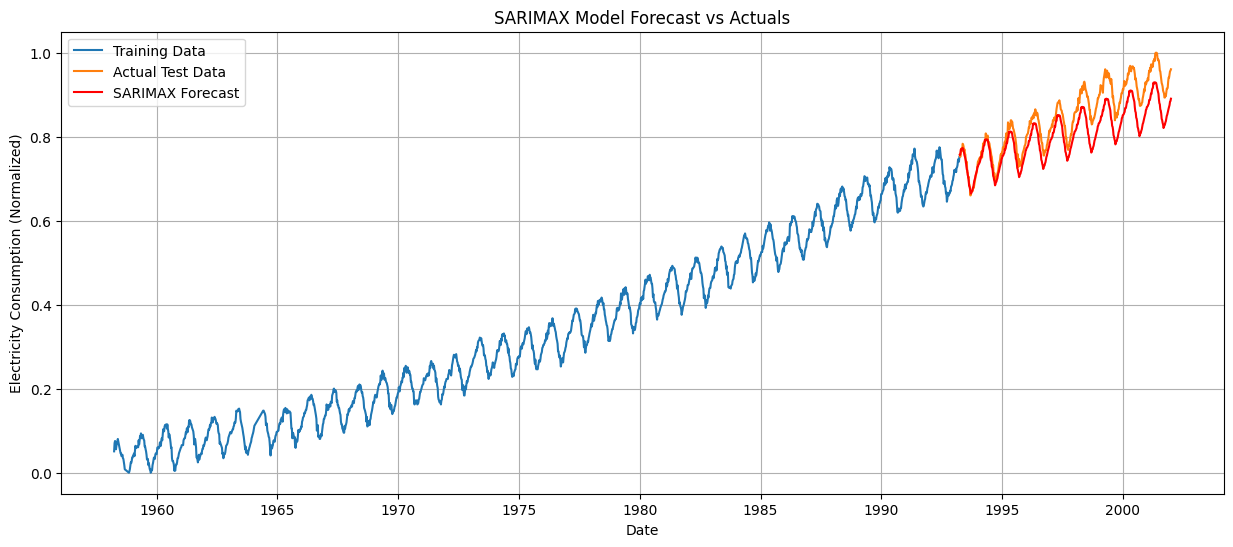

In [15]:
import matplotlib.pyplot as plt
sarimax_train_predictions = sarimax_results.get_prediction(start=0, end=len(train_data)-1)
sarimax_train_pred_mean = sarimax_train_predictions.predicted_mean
sarimax_test_forecast = sarimax_results.get_forecast(steps=len(test_data))
sarimax_test_forecast_mean = sarimax_test_forecast.predicted_mean
print("SARIMAX in-sample predictions head:")
print(sarimax_train_pred_mean.head())
print("\nSARIMAX out-of-sample forecasts head:")
print(sarimax_test_forecast_mean.head())
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data[target_variable], label='Training Data')
plt.plot(test_data.index, test_data[target_variable], label='Actual Test Data')
plt.plot(sarimax_test_forecast_mean.index, sarimax_test_forecast_mean, color='red', label='SARIMAX Forecast')
plt.title('SARIMAX Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data[target_variable], sarimax_test_forecast_mean))
mae = mean_absolute_error(test_data[target_variable], sarimax_test_forecast_mean)
print(f"\nSARIMAX Model Performance on Test Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


SARIMAX Model Performance on Test Set:
RMSE: 0.0485
MAE: 0.0415


In [17]:
df_cleaned = df.dropna()
print("DataFrame head after dropping NaN values:")
print(df_cleaned.head())
print("\nDataFrame info after dropping NaN values:")
print(df_cleaned.info())
print("\nMissing values after dropping NaN values:")
print(df_cleaned.isnull().sum())

DataFrame head after dropping NaN values:
            electricity_consumption  year  month_of_year  day_of_month  \
1958-04-26                 0.055829   0.0       0.272727      0.833333   
1958-05-03                 0.064039   0.0       0.363636      0.066667   
1958-05-10                 0.068966   0.0       0.363636      0.300000   
1958-05-17                 0.073892   0.0       0.363636      0.533333   
1958-05-24                 0.080460   0.0       0.363636      0.766667   

            day_of_week  electricity_consumption_lag_1  \
1958-04-26          0.0                       0.073892   
1958-05-03          0.0                       0.055829   
1958-05-10          0.0                       0.064039   
1958-05-17          0.0                       0.068966   
1958-05-24          0.0                       0.073892   

            electricity_consumption_lag_2  electricity_consumption_lag_3  \
1958-04-26                       0.075534                       0.070608   
1958-05-03  

In [18]:
import numpy as np
sequence_length = 20
features = df_cleaned.drop(columns=['electricity_consumption']).values
target = df_cleaned['electricity_consumption'].values
X, y = [], []
for i in range(sequence_length, len(df_cleaned)):
    X.append(df_cleaned.iloc[i-sequence_length : i].values)
    y.append(df_cleaned.iloc[i]['electricity_consumption'])
X = np.array(X)
y = np.array(y)
print(f"Shape of X (input sequences): {X.shape}")
print(f"Shape of y (target values): {y.shape}")

Shape of X (input sequences): (2260, 20, 9)
Shape of y (target values): (2260,)


In [19]:
import numpy as np
train_split = int(0.7 * len(X))
val_split = int(0.1 * len(X))
test_split = len(X) - train_split - val_split
X_train, y_train = X[0:train_split], y[0:train_split]
X_val, y_val = X[train_split:train_split + val_split], y[train_split:train_split + val_split]
X_test, y_test = X[train_split + val_split:], y[train_split + val_split:]
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1582, 20, 9)
Shape of y_train: (1582,)
Shape of X_val: (226, 20, 9)
Shape of y_val: (226,)
Shape of X_test: (452, 20, 9)
Shape of y_test: (452,)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
print("TensorFlow and Keras libraries imported.")

TensorFlow and Keras libraries imported.


In [21]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
print("LSTM Model Summary:")
model.summary()

C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,051 (47.07 KB)

 Trainable params: 12,051 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
epochs = 50
batch_size = 32
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)
print(f"\nModel training complete after {epochs} epochs.")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0049 - mean_absolute_error: 0.0455 - val_loss: 9.3892e-04 - val_mean_absolute_error: 0.0233
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.1238e-04 - mean_absolute_error: 0.0164 - val_loss: 6.5667e-04 - val_mean_absolute_error: 0.0216
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9932e-04 - mean_absolute_error: 0.0141 - val_loss: 4.4035e-04 - val_mean_absolute_error: 0.0170
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9687e-04 - mean_absolute_error: 0.0112 - val_loss: 2.9722e-04 - val_mean_absolute_error: 0.0135
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3744e-04 - mean_absolute_error: 0.0093 - val_loss: 2.5227e-04 - val_mean_absolute_error: 0.0122
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1920e-04 - mean_absolute_error: 0.0086 - val_loss: 1.6630e-04 - val_mean_absolute_error: 0.0104
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
lstm_predictions = model.predict(X_test)
lstm_predictions_1d = lstm_predictions.flatten()
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions_1d))
mae_lstm = mean_absolute_error(y_test, lstm_predictions_1d)
print(f"\nLSTM Model Performance on Test Set:")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

LSTM Model Performance on Test Set:
RMSE: 0.0280
MAE: 0.0255


In [24]:
import numpy as np
lstm_units_range = [50, 75, 100] 
learning_rates_range = [0.01, 0.001, 0.0001] 
sequence_lengths_range = [10, 20, 30] 
results = []
print(f"Hyperparameter ranges defined:")
print(f"LSTM Units: {lstm_units_range}")
print(f"Learning Rates: {learning_rates_range}")
print(f"Sequence Lengths: {sequence_lengths_range}")

Hyperparameter ranges defined:
LSTM Units: [50, 75, 100]
Learning Rates: [0.01, 0.001, 0.0001]
Sequence Lengths: [10, 20, 30]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
best_rmse = float('inf')
best_params = {}
for lstm_units in lstm_units_range:
    for learning_rate in learning_rates_range:
        for current_sequence_length in sequence_lengths_range:
            print(f"\n--- Tuning: LSTM Units={lstm_units}, Learning Rate={learning_rate}, Sequence Length={current_sequence_length} ---")
            X_temp, y_temp = [], []
            features_temp = df_cleaned.drop(columns=['electricity_consumption']).values
            target_temp = df_cleaned['electricity_consumption'].values
            for i in range(current_sequence_length, len(df_cleaned)):
                X_temp.append(df_cleaned.iloc[i-current_sequence_length : i].values)
                y_temp.append(df_cleaned.iloc[i]['electricity_consumption'])
            X_temp = np.array(X_temp)
            y_temp = np.array(y_temp)
            train_split = int(0.7 * len(X_temp))
            val_split = int(0.1 * len(X_temp))
            current_test_split_len = len(X_temp) - train_split - val_split
            if current_test_split_len <= 0:
                print(f"Skipping combination (seq_len={current_sequence_length}) due to insufficient data for test set.")
                continue
            X_train_tuned, y_train_tuned = X_temp[0:train_split], y_temp[0:train_split]
            X_val_tuned, y_val_tuned = X_temp[train_split:train_split + val_split], y_temp[train_split:train_split + val_split]
            X_test_tuned, y_test_tuned = X_temp[train_split + val_split:], y_temp[train_split + val_split:]
            num_features = X_train_tuned.shape[2]
            model_tuned = Sequential()
            model_tuned.add(LSTM(units=lstm_units, activation='relu', input_shape=(current_sequence_length, num_features)))
            model_tuned.add(Dense(units=1))
            optimizer_tuned = Adam(learning_rate=learning_rate)
            model_tuned.compile(optimizer=optimizer_tuned, loss='mean_squared_error', metrics=['mean_absolute_error'])
            history_tuned = model_tuned.fit(
                X_train_tuned, y_train_tuned,
                epochs=20,
                batch_size=32,
                validation_data=(X_val_tuned, y_val_tuned),
                verbose=0 
            )
            lstm_predictions_tuned = model_tuned.predict(X_test_tuned, verbose=0).flatten()
            rmse_tuned = np.sqrt(mean_squared_error(y_test_tuned, lstm_predictions_tuned))
            mae_tuned = mean_absolute_error(y_test_tuned, lstm_predictions_tuned)
            print(f"   Test RMSE: {rmse_tuned:.4f}, Test MAE: {mae_tuned:.4f}")
            results.append({
                'lstm_units': lstm_units,
                'learning_rate': learning_rate,
                'sequence_length': current_sequence_length,
                'rmse': rmse_tuned,
                'mae': mae_tuned
            })
            if rmse_tuned < best_rmse:
                best_rmse = rmse_tuned
                best_params = {
                    'lstm_units': lstm_units,
                    'learning_rate': learning_rate,
                    'sequence_length': current_sequence_length,
                    'rmse': best_rmse,
                    'mae': mae_tuned
                }


--- Tuning: LSTM Units=50, Learning Rate=0.01, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0124, Test MAE: 0.0099

--- Tuning: LSTM Units=50, Learning Rate=0.01, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0156, Test MAE: 0.0127

--- Tuning: LSTM Units=50, Learning Rate=0.01, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0137, Test MAE: 0.0115

--- Tuning: LSTM Units=50, Learning Rate=0.001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0298, Test MAE: 0.0260

--- Tuning: LSTM Units=50, Learning Rate=0.001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0213, Test MAE: 0.0177

--- Tuning: LSTM Units=50, Learning Rate=0.001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0419, Test MAE: 0.0339

--- Tuning: LSTM Units=50, Learning Rate=0.0001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0966, Test MAE: 0.0852

--- Tuning: LSTM Units=50, Learning Rate=0.0001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0533, Test MAE: 0.0461

--- Tuning: LSTM Units=50, Learning Rate=0.0001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.1548, Test MAE: 0.1186

--- Tuning: LSTM Units=75, Learning Rate=0.01, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0290, Test MAE: 0.0269

--- Tuning: LSTM Units=75, Learning Rate=0.01, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0319, Test MAE: 0.0296

--- Tuning: LSTM Units=75, Learning Rate=0.01, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0125, Test MAE: 0.0101

--- Tuning: LSTM Units=75, Learning Rate=0.001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0418, Test MAE: 0.0377

--- Tuning: LSTM Units=75, Learning Rate=0.001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0413, Test MAE: 0.0384

--- Tuning: LSTM Units=75, Learning Rate=0.001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0196, Test MAE: 0.0170

--- Tuning: LSTM Units=75, Learning Rate=0.0001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0575, Test MAE: 0.0509

--- Tuning: LSTM Units=75, Learning Rate=0.0001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0554, Test MAE: 0.0447

--- Tuning: LSTM Units=75, Learning Rate=0.0001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.1037, Test MAE: 0.0914

--- Tuning: LSTM Units=100, Learning Rate=0.01, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0096, Test MAE: 0.0078

--- Tuning: LSTM Units=100, Learning Rate=0.01, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0306, Test MAE: 0.0291

--- Tuning: LSTM Units=100, Learning Rate=0.01, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0200, Test MAE: 0.0181

--- Tuning: LSTM Units=100, Learning Rate=0.001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0261, Test MAE: 0.0224

--- Tuning: LSTM Units=100, Learning Rate=0.001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0296, Test MAE: 0.0262

--- Tuning: LSTM Units=100, Learning Rate=0.001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0462, Test MAE: 0.0440

--- Tuning: LSTM Units=100, Learning Rate=0.0001, Sequence Length=10 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0305, Test MAE: 0.0250

--- Tuning: LSTM Units=100, Learning Rate=0.0001, Sequence Length=20 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0279, Test MAE: 0.0228

--- Tuning: LSTM Units=100, Learning Rate=0.0001, Sequence Length=30 ---


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Test RMSE: 0.0528, Test MAE: 0.0420


In [27]:
print("\n--- Hyperparameter Tuning Results ---")
if best_params:
    print(f"Best Hyperparameters: LSTM Units = {best_params['lstm_units']}, Learning Rate = {best_params['learning_rate']}, Sequence Length = {best_params['sequence_length']}")
    print(f"Best RMSE: {best_params['rmse']:.4f}")
    print(f"Best MAE: {best_params['mae']:.4f}")
else:
    print("No best parameters found. Tuning might not have completed successfully or no valid combinations were tested.")


--- Hyperparameter Tuning Results ---
Best Hyperparameters: LSTM Units = 100, Learning Rate = 0.01, Sequence Length = 10
Best RMSE: 0.0096
Best MAE: 0.0078


In [28]:
import numpy as np
optimal_sequence_length = best_params['sequence_length']
features_final = df_cleaned.drop(columns=['electricity_consumption']).values
target_final = df_cleaned['electricity_consumption'].values
X_final, y_final = [], []
for i in range(optimal_sequence_length, len(df_cleaned)):
    X_final.append(df_cleaned.iloc[i-optimal_sequence_length : i].values)
    y_final.append(df_cleaned.iloc[i]['electricity_consumption'])
X_final = np.array(X_final)
y_final = np.array(y_final)
print(f"Re-created X_final shape with optimal sequence length ({optimal_sequence_length}): {X_final.shape}")
print(f"Re-created y_final shape with optimal sequence length ({optimal_sequence_length}): {y_final.shape}")

Re-created X_final shape with optimal sequence length (10): (2270, 10, 9)
Re-created y_final shape with optimal sequence length (10): (2270,)


In [30]:
import numpy as np
train_split_final = int(0.7 * len(X_final))
val_split_final = int(0.1 * len(X_final))
X_train_final, y_train_final = X_final[0:train_split_final], y_final[0:train_split_final]
X_val_final, y_val_final = X_final[train_split_final:train_split_final + val_split_final], y_final[train_split_final:train_split_final + val_split_final]
X_test_final, y_test_final = X_final[train_split_final + val_split_final:], y_final[train_split_final + val_split_final:]
print(f"Shape of X_train_final: {X_train_final.shape}")
print(f"Shape of y_train_final: {y_train_final.shape}")
print(f"Shape of X_val_final: {X_val_final.shape}")
print(f"Shape of y_val_final: {y_val_final.shape}")
print(f"Shape of X_test_final: {X_test_final.shape}")
print(f"Shape of y_test_final: {y_test_final.shape}")

Shape of X_train_final: (1589, 10, 9)
Shape of y_train_final: (1589,)
Shape of X_val_final: (227, 10, 9)
Shape of y_val_final: (227,)
Shape of X_test_final: (454, 10, 9)
Shape of y_test_final: (454,)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
optimal_lstm_units = best_params['lstm_units']
optimal_learning_rate = best_params['learning_rate']
model_final = Sequential()
model_final.add(LSTM(units=optimal_lstm_units, activation='relu', input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
model_final.add(Dense(units=1)) 
optimizer_final = Adam(learning_rate=optimal_learning_rate)
model_final.compile(optimizer=optimizer_final, loss='mean_squared_error', metrics=['mean_absolute_error'])
print(f"Final LSTM Model configured with units={optimal_lstm_units}, learning_rate={optimal_learning_rate}")
print("Final LSTM Model Summary:")
model_final.summary()

Final LSTM Model configured with units=100, learning_rate=0.01
Final LSTM Model Summary:


C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 100)            │        44,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,101 (172.27 KB)

 Trainable params: 44,101 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epochs_final = 50 
batch_size_final = 32
history_final = model_final.fit(
    X_train_final, y_train_final,
    epochs=epochs_final,
    batch_size=batch_size_final,
    validation_data=(X_val_final, y_val_final),
    verbose=1
)
print(f"\nFinal model training complete after {epochs_final} epochs.")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0071 - mean_absolute_error: 0.0473 - val_loss: 8.0613e-04 - val_mean_absolute_error: 0.0233
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.9889e-04 - mean_absolute_error: 0.0160 - val_loss: 3.7245e-04 - val_mean_absolute_error: 0.0156
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8701e-04 - mean_absolute_error: 0.0139 - val_loss: 3.6667e-04 - val_mean_absolute_error: 0.0155
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4560e-04 - mean_absolute_error: 0.0127 - val_loss: 2.9696e-04 - val_mean_absolute_error: 0.0142
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0634e-04 - mean_absolute_error: 0.0115 - val_loss: 3.4621e-04 - val_mean_absolute_error: 0.0157
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9552e-04 - mean_absolute_error: 0.0110 - val_loss: 1.5119e-04 - val_mean_absolute_error: 0.0101
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Final Tuned LSTM Model Performance on Test Set:
RMSE: 0.0174
MAE: 0.0157

Comparison with SARIMAX Model:
SARIMAX RMSE: 0.0485
SARIMAX MAE: 0.0415


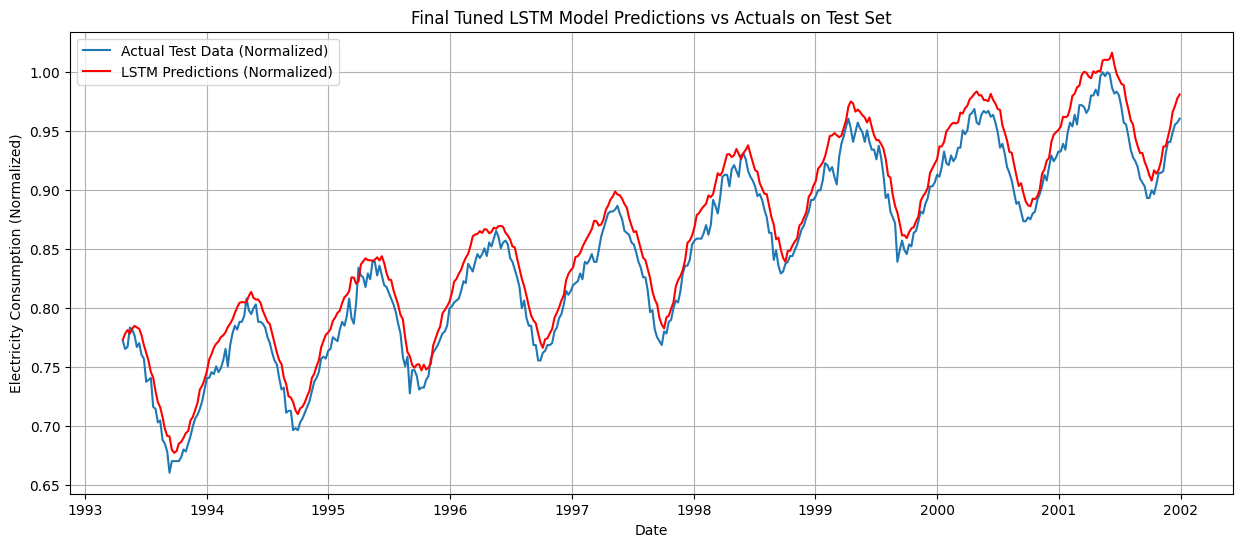

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
final_lstm_predictions = model_final.predict(X_test_final)
final_lstm_predictions_1d = final_lstm_predictions.flatten()
rmse_final_lstm = np.sqrt(mean_squared_error(y_test_final, final_lstm_predictions_1d))
mae_final_lstm = mean_absolute_error(y_test_final, final_lstm_predictions_1d)
print(f"\nFinal Tuned LSTM Model Performance on Test Set:")
print(f"RMSE: {rmse_final_lstm:.4f}")
print(f"MAE: {mae_final_lstm:.4f}")
print("\nComparison with SARIMAX Model:")
sarimax_rmse = 0.0485
sarimax_mae = 0.0415
print(f"SARIMAX RMSE: {sarimax_rmse:.4f}")
print(f"SARIMAX MAE: {sarimax_mae:.4f}")
full_index_for_plot = df_cleaned.index[optimal_sequence_length : ]
index_test_final = full_index_for_plot[train_split_final + val_split_final:]
plt.figure(figsize=(15, 6))
plt.plot(index_test_final, y_test_final, label='Actual Test Data (Normalized)')
plt.plot(index_test_final, final_lstm_predictions_1d, color='red', label='LSTM Predictions (Normalized)')
plt.title('Final Tuned LSTM Model Predictions vs Actuals on Test Set')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import shap
print("SHAP library imported successfully!")


SHAP library imported successfully!


In [35]:
import numpy as np 
peak_index_in_y_test = np.argmax(y_test_final)
trough_index_in_y_test = np.argmin(y_test_final)
print(f"Index of peak value in y_test_final: {peak_index_in_y_test}")
print(f"Peak value in y_test_final: {y_test_final[peak_index_in_y_test]:.4f}")
print(f"Index of trough value in y_test_final: {trough_index_in_y_test}")
print(f"Trough value in y_test_final: {y_test_final[trough_index_in_y_test]:.4f}")

Index of peak value in y_test_final: 420
Peak value in y_test_final: 1.0000
Index of trough value in y_test_final: 20
Trough value in y_test_final: 0.6601


In [36]:
X_peak_sample = X_test_final[peak_index_in_y_test:peak_index_in_y_test+1]
X_trough_sample = X_test_final[trough_index_in_y_test:trough_index_in_y_test+1]
print(f"Shape of X_peak_sample: {X_peak_sample.shape}")
print(f"Shape of X_trough_sample: {X_trough_sample.shape}")

Shape of X_peak_sample: (1, 10, 9)
Shape of X_trough_sample: (1, 10, 9)


In [37]:
import shap
model_predict = lambda x: model_final.predict(x).flatten()
background_data = shap.sample(X_train_final, 100)
explainer = shap.KernelExplainer(model_predict, background_data)
print("SHAP KernelExplainer created successfully.")
print(f"Background data shape: {background_data.shape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
SHAP KernelExplainer created successfully.
Background data shape: (100, 10, 9)
